Importing the required modules.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [7]:
#Let's load the dataframe.
data = pd.read_csv('C:\Springboard Capstone Projects\Springboard_Capstone_Projects\Springboard_Capstone_Projects\Springboard_Capstone_Project_1\Data\\train_data.csv')

Let us analyze the columns.We can see that there are 13 columns in total. Our goal based on this dataset would be to predict the value of the dependent variable, 'Loan_Status'

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


Some of the columns have missing data in them. However, since over 95% of the data is availabe, 
let us start with some initial hypotheses.

A statistical summary of the numerical variables computed below.

In [28]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Let us try to find the % of approved loans for males and females. Once we have results, let's see if we can
come up with a hypotheses that indicates more approved loans for either men or women

In [29]:
male_count = data['Gender'][data.Gender == 'Male'].count()
women_count = data['Gender'][data.Gender == 'Female'].count()

In [30]:
male_count

489

In [31]:
women_count

112

From our obervations above, it's easy to see that a majority of the laon applicants were males. Noe let us try and compute
the % of approved loans for men and women

In [32]:
apprv_loans_male = data[(data.Gender == 'Male') & (data.Loan_Status == 'Y')]
apprv_loans_male = apprv_loans_male[['Gender']].count()
apprv_loans_male

Gender    339
dtype: int64

In [33]:
apprv_loans_fem = data[(data.Gender == 'Female') & (data.Loan_Status == 'Y')]
apprv_loans_fem = apprv_loans_fem[['Gender']].count()
apprv_loans_fem

Gender    75
dtype: int64

In [34]:
pct_male_aprv = apprv_loans_male / male_count * 100
pct_fem_aprv =  apprv_loans_fem / women_count * 100

In [35]:
pct_male_aprv

Gender    69.325153
dtype: float64

In [36]:
pct_fem_aprv

Gender    66.964286
dtype: float64

In [37]:
list1 = [pct_male_aprv, pct_fem_aprv]
list2 = ['Male', 'Female']
z = pd.DataFrame(list1, list2)

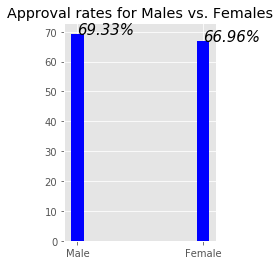

In [60]:
x = z.index
y = round(z['Gender'],2) #Rounding off to two decimal digits
plt.subplot(1,2,1) 
plt.bar(x,y, color = 'blue', width=0.1, align = 'center') #Plotted a bar graph
plt.title('Approval rates for Males vs. Females', loc = 'center')

for a,b in zip(x, y):
    plt.text(a, b, str(b) + '%', ha='left', va ='baseline', fontsize = 15, fontstyle = 'oblique')
plt.show()

From the bar plot below, males do have a higher approval rate. However, the difference in percentage isn't significant enough 
to fully support our hypothesis.

Next, let us try to see of Graduates have a significantly higher approval rate compared to non-graduates.

In [10]:
apprv_loans_grad =    data[(data.Education == 'Graduate') & (data.Loan_Status == 'Y')] 
apprv_loans_notgrad = data[(data.Education == 'Not Graduate') & (data.Loan_Status == 'Y')]
grads_aprv_count = len(apprv_loans_grad)
notgrads_aprv_count = len(apprv_loans_notgrad)

Now let us compute the percentages of loans approved for graduates and non-graduates

In [11]:
grad_aprv_pct = grads_aprv_count / len(data.loc[data.Education == 'Graduate']) * 100
notgrad_aprv_pct = notgrads_aprv_count / len(data.loc[data.Education == 'Graduate']) * 100

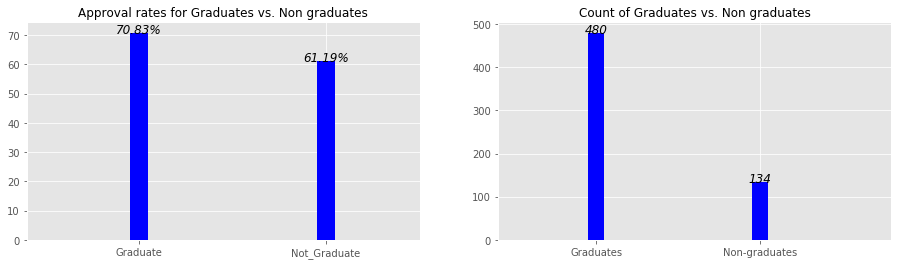

In [85]:
list1 = [grad_aprv_pct, notgrad_aprv_pct]
list2 = ['Graduate', 'Not_Graduate']
z = pd.DataFrame(list1, list2) #Merged the lists into a DataFrame
z.columns = ['percentage approved']
x = z.index 
y = round(z['percentage approved'],2)
#First subplot is for the percentage comparison
plt.subplot(1,2,1)
plt.bar(x,y, color = 'blue',width=0.1, align='center')
plt.title('Approval rates for Graduates vs. Non graduates', fontsize=12)
plt.xlim(0-0.6, 2-0.5) #Set xlimits to adjust the spacing between the par blots.
for a,b in zip(x, y):
    plt.text(a, b, str(b) + '%',ha='center', va ='baseline', fontsize = 12, fontstyle = 'oblique') #Outputs text above the bars.

grad_count = len(data.loc[data.Education == 'Graduate'])
notgrad_count = len(data.loc[data.Education != 'Graduate'])
list_grad = [grad_count, notgrad_count]
list_grad = pd.DataFrame(list_grad, index=['Graduates', 'Non-graduates'])
list_grad.columns = ['Count']

x = list_grad.index
y = list_grad['Count']
plt.subplot(1,2,2)
#Second subplot is for comparing the counts of the number of graduates vs. non-graduates.
plt.bar(x,y, color = 'blue', width=0.1)
plt.xlim(0-0.6, 2-0.2)
plt.title('Count of Graduates vs. Non graduates', fontsize = 12)

for a,b in zip(x, y):
    plt.text(a, b, str(b) , ha='center', va ='baseline', fontsize = 12, fontstyle = 'oblique')
plt.subplots_adjust(left=1, bottom=None, right=3)
plt.tight_layout
plt.show()


From the first bar plot above, we see that graudates have a ~10% higher approval rate in comparison to non-graduates. From the second plot above, we see that non-graduates are significant in number and hence, we could aruge that our hypothesis could be true.If the number of non-graduates were too few in number as compared to graduates, then we can cannot confidently support our hypothesis as there simply aren't enough samples. 

<font color=red>**If there are an insignificant number of non-graduates in comparison to graduates or vice-versa, then we might have to consider rejecting the hypothesis as there aren’t enough samples to support our hypothesis. [Note: This process will be followed for evaluating the other variables as well.]**</font>

Next, let us consider the property area.

In [87]:
urban_aprv = data[(data.Property_Area == 'Urban') & (data.Loan_Status == 'Y')] #Approved urban property lons
rural_aprv = data[(data.Property_Area == 'Rural') & (data.Loan_Status == 'Y')] #Approved rural property lons
semi_ur_aprv = data[(data.Property_Area == 'Semiurban') & (data.Loan_Status == 'Y')] #Approved semiurban property lons

In [88]:
pct_urb_aprv = len(urban_aprv) / len(data.loc[data.Property_Area == 'Urban']) * 100 #percentage of urban property loans approved
pct_rur_aprv = len(rural_aprv) / len(data.loc[data.Property_Area == 'Rural']) * 100 #percentage of rural property loans approved
pct_su_aprv = len(semi_ur_aprv) / len(data.loc[data.Property_Area == 'Semiurban']) * 100 #percentage of semiurban propert loans approved

In [89]:
z = pd.DataFrame([pct_urb_aprv, pct_rur_aprv , pct_su_aprv],['Urban', 'Rural', 'Semiurban'])
z.columns = ['percentage approved']


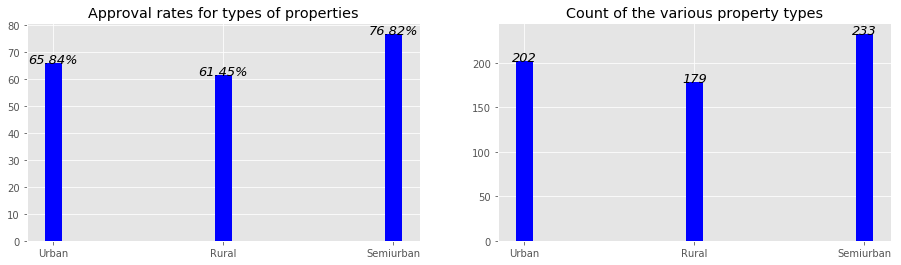

In [91]:
x = z.index
y = round(z['percentage approved'],2)
#First subplot is for the percentages of loans approved by property.
plt.subplot(1,2,1)
plt.bar(x,y, color = 'blue', width=0.1)
plt.title('Approval rates for types of properties')

for a,b in zip(x, y):
    plt.text(a, b, str(b) + '%', ha='center', va ='baseline', fontsize = 13, fontstyle = 'oblique')

#Next, let us consider the type of property for which the loan was requested.
urban_count = len(data.loc[data.Property_Area == 'Urban'])
rural_count = len(data.loc[data.Property_Area == 'Rural'])
s_urban_count = len(data.loc[data.Property_Area == 'Semiurban'])
list_prop = [urban_count, rural_count, s_urban_count]
list_prop = pd.DataFrame(list_prop, index=['Urban', 'Rural', 'Semiurban'])
list_prop.columns = ['Count']

x = list_prop.index
y = list_prop['Count']
#Second subplot is for the count of loans requested for each property type.
plt.subplot(1,2,2)
plt.bar(x,y, color = 'blue', width=0.1)
plt.title('Count of the various property types')

for a,b in zip(x, y):
    plt.text(a, b, str(b) , ha='center', va ='baseline', fontsize = 13, fontstyle = 'oblique')
plt.subplots_adjust(left=1, bottom=None, right=3)
plt.show()

From the graph below, we can see a significant number of samples for each of the property types. Hence,
we could argue that our hypothesis holds good for now.

In [92]:
#Let us consider the approval rates for people with credit vs. those with no credit.
cred_0_aprv = data[(data.Credit_History == 0.0) & (data.Loan_Status == 'Y')] #People with credit_history 0.0 and approved

In [94]:
cred_1_aprv = data[(data.Credit_History == 1.0) & (data.Loan_Status == 'Y')] #People with credit_history 0.0 and approved

In [95]:
pct_cred_0 = len(cred_0_aprv) / len(data.loc[data.Credit_History == 0.0]) * 100
pct_cred_1 = len(cred_1_aprv) / len(data.loc[data.Credit_History == 1.0]) * 100

In [96]:
z = pd.DataFrame([pct_cred_0, pct_cred_1], ['Credit_0', 'Credit_1'])
z.columns = ['% approved']
z = z.sort_values(by = '% approved',ascending=False)

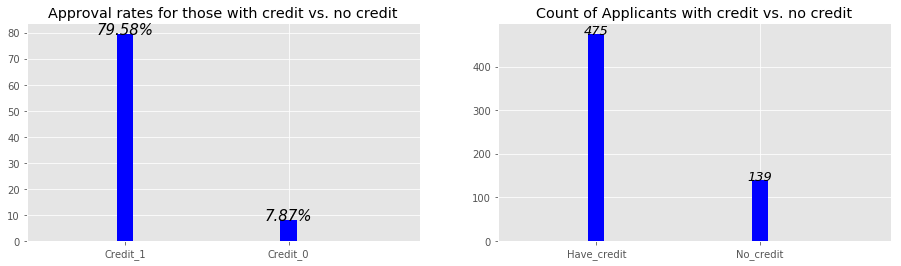

In [101]:
x = z.index
y = round(z['% approved'],2)
plt.xlim(0-0.6, 2-0.2)
axes = plt.gca()
axes.set_ylim([0,85])
plt.subplot(1,2,1)
plt.bar(x,y, color = 'blue', width=0.1)
plt.xlim(0-0.6, 2-0.2)
plt.title('Approval rates for those with credit vs. no credit')

for a,b in zip(x, y):
    plt.text(a, b, str(b) + '%', ha='center', va ='baseline', fontsize = 15, fontstyle = 'oblique')

#From the graph below, it appears that people with credit are 10 times more likely to get approvd than those without credit.

#Let us also account for the number of people with credit vs those without credit in the train file.
cred_count = len(data.loc[data.Credit_History == 1.0])
no_cred_count = len(data.loc[data.Credit_History != 1.0])
list_cred = [cred_count, no_cred_count]
list_cred = pd.DataFrame(list_cred, index=['Have_credit', 'No_credit'])
list_cred.columns = ['Count']

x = list_cred.index
y = list_cred['Count']
plt.subplot(1,2,2)
plt.bar(x,y, color = 'blue', width=0.1)
plt.xlim(0-0.6, 2-0.2)
plt.title('Count of Applicants with credit vs. no credit')

for a,b in zip(x, y):
    plt.text(a, b, str(b) , ha='center', va ='baseline', fontsize = 13, fontstyle = 'oblique')
plt.subplots_adjust(left=1, bottom=None, right=3)
plt.show()

Since there are a significant number of employees with no credit, we could argue that our hypothesis hold true.

Now, let us investigate how loan amounts vary with applicant incomes.

(0, 90000)

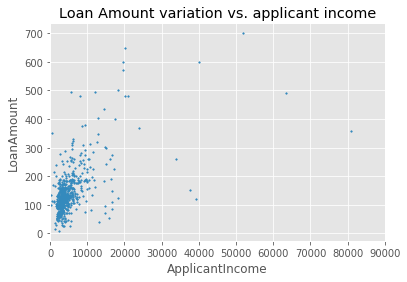

In [39]:
data.plot(kind = 'scatter', x='ApplicantIncome', y = 'LoanAmount', title = 'Loan Amount variation vs. applicant income', s=2.5)
plt.xlim([0,90000])

From the plot above, there's not enough evidence to suggest that applicants with greater incomes apply for larger loan amounts. 
However, there are many data points that are spread out diversely. As a result, there's no solid pattern to suggest that
applicants with greater incomes request for greater loan amounts.

Let's explore the distributions of the applicant incomes

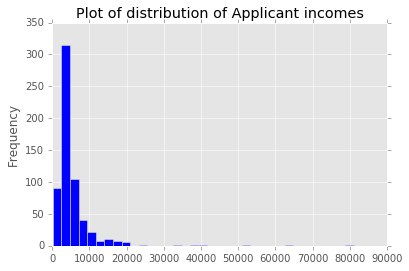

In [334]:
data['ApplicantIncome'].plot(kind = 'hist', bins =35, color = 'blue', title = 'Plot of distribution of Applicant incomes')

A majority of the applicants have an income between $2500 and $5000. In fact, they make up more than 50% of the
applicants.

Next, let us consider the distribution of the loan amounts requested.

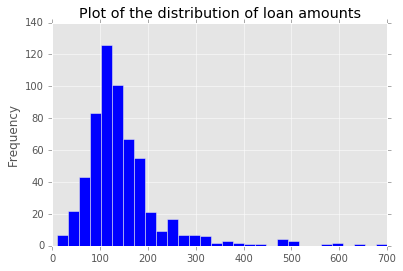

In [332]:
data['LoanAmount'].plot(kind = 'hist', color='blue',bins=30, title = 'Plot of the distribution of loan amounts')

From the graph above, a vast majority of the applicants opt for loans that amount to 200 or less. However, we can see that 
this dataset has quite a few outliers.